# Predicting whether a patron will make a checkout in their first year of library tenure at SF public libraries

## Exploratory Data Analysis

1. Import packages and read dataset

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# reading the CSV file
df = pd.read_csv('Library_Usage.csv')

In [9]:
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,1,Juvenile,0,0,0 to 9 years,r3,Richmond,NaN,NaN,z,Email,True,2022,True
1,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2022,True
2,0,Adult,0,0,35 to 44 years,m4,Merced,NaN,NaN,z,Email,True,2019,True
3,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2021,True
4,2,Teen,0,0,10 to 19 years,b2,Bayview,NaN,NaN,z,Email,True,2013,True


2. Understand relationships between variables

<AxesSubplot: xlabel='Year Patron Registered'>

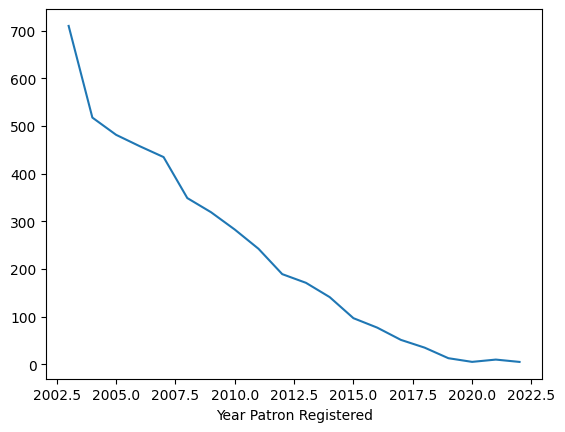

In [153]:
df.groupby(['Year Patron Registered'], sort=True)['Total Checkouts'].mean().plot()

<AxesSubplot: xlabel='Age Range'>

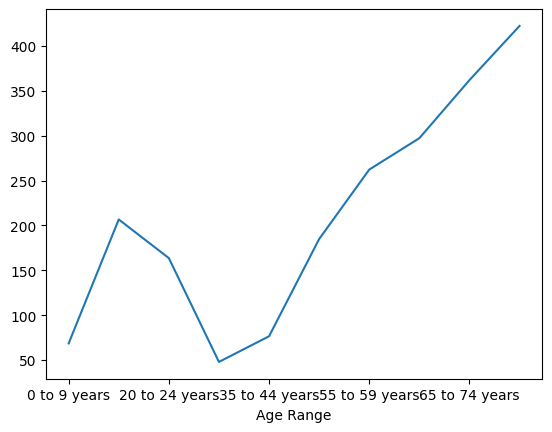

In [154]:
df.groupby(['Age Range'], sort=True)['Total Checkouts'].mean().plot()

3. Creating additional columns for analysis

In [155]:
# creating a tenure column for number of years since registering
df['Tenure']=2023-df['Year Patron Registered']

In [156]:
# averaging out total checkouts by number of years of tenure
df['Yearly Checkouts']=df['Total Checkouts']/df['Tenure']

<AxesSubplot: >

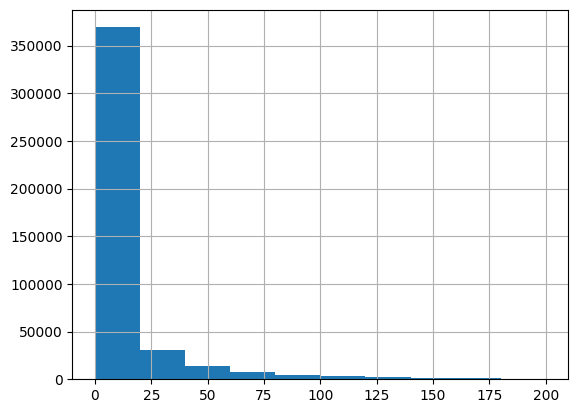

In [158]:
df['Yearly Checkouts'].hist(range=(0,200))

<AxesSubplot: xlabel='Year Patron Registered'>

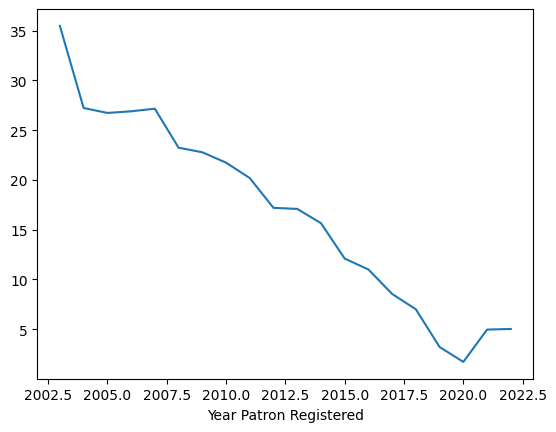

In [159]:
df.groupby(['Year Patron Registered'], sort=True)['Yearly Checkouts'].mean().plot()

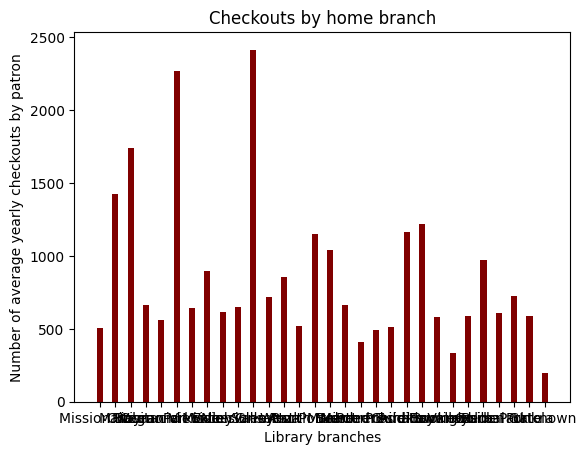

In [88]:
libraries = list(df['Home Library Definition'])
checkouts = list(df['Yearly Checkouts'])

 
# creating the bar plot
plt.bar(libraries, checkouts, color ='maroon',
        width = 0.4)
 
plt.xlabel("Library branches")
plt.ylabel("Number of average yearly checkouts by patron")
plt.title("Checkouts by home branch")
plt.show()

## Data Cleaning and Preparation

4. Create our target variable for model

In [160]:
# create target variable
df['Made Checkout']= np.where(df['Total Checkouts']==0, 0, 1)

5. Delete extraneous columns

In [161]:
# want to predict whether a customer will make a checkout within the first year of registration
# going to look at customers who registered in 2021: not perfect, since some will have 2+ years and some only 1
# only registration data: patron type, age, home library, notice preference, provided email
df_pred = df[['Patron Type Definition','Age Range','Home Library Definition','Notice Preference Definition','Provided Email Address','Year Patron Registered','Made Checkout']].copy()


In [162]:
df_pred.head()

,Patron Type Definition,Age Range,Home Library Definition,Notice Preference Definition,Provided Email Address,Year Patron Registered,Made Checkout
0,Juvenile,0 to 9 years,Richmond,Email,True,2022,0
1,Teen,10 to 19 years,Main,Email,True,2022,0
2,Adult,35 to 44 years,Merced,Email,True,2019,0
3,Teen,10 to 19 years,Main,Email,True,2021,0
4,Teen,10 to 19 years,Bayview,Email,True,2013,0


In [163]:
# we wish to consider only records where patron registered in 2021
df_pred_2021 = df_pred.where(df_pred['Year Patron Registered']==2021)

In [164]:
df_pred_2021.describe(include = 'all')

,Patron Type Definition,Age Range,Home Library Definition,Notice Preference Definition,Provided Email Address,Year Patron Registered,Made Checkout
count,32568,32517,32568,32568,32568,32568.0,32568.000000
unique,16,10,30,4,2,NaN,NaN
top,Adult,25 to 34 years,Main,Email,True,NaN,NaN
freq,19878,9459,18152,30437,30453,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2021.0,0.391796
std,NaN,NaN,NaN,NaN,NaN,0.0,0.488159
min,NaN,NaN,NaN,NaN,NaN,2021.0,0.000000
25%,NaN,NaN,NaN,NaN,NaN,2021.0,0.000000
50%,NaN,NaN,NaN,NaN,NaN,2021.0,0.000000
75%,NaN,NaN,NaN,NaN,NaN,2021.0,1.000000


6. Understand null values

In [167]:
df_pred_2021.isna()

,Patron Type Definition,Age Range,Home Library Definition,Notice Preference Definition,Provided Email Address,Year Patron Registered,Made Checkout
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
437110,True,True,True,True,True,True,True
437111,True,True,True,True,True,True,True
437112,True,True,True,True,True,True,True
437113,True,True,True,True,True,True,True


In [169]:
# determine rows where all columns are null
null_index_list = []
for i in range(0,len(df_pred_2021)):
    if df_pred_2021.loc[[i]].isna().sum().sum() == 7:
        null_index_list.append(i)

In [170]:
# remove these columns from the dataframe
df_pred_2021.drop(null_index_list, axis=0, inplace=True)

In [171]:
# number of records by target
df_pred_2021.groupby(['Made Checkout']).count()

,Patron Type Definition,Age Range,Home Library Definition,Notice Preference Definition,Provided Email Address,Year Patron Registered
Made Checkout,,,,,,
0.0,19808,19763,19808,19808,19808,19808
1.0,12760,12754,12760,12760,12760,12760


Looks like a nearly 1:1 ratio which is great-- likely won't need any re-sampling

7. One-hot encoding

In [190]:
# Transform feature gender and degree using one-hot-encoding

df_pred_dummies = pd.get_dummies(df_pred_2021, columns=['Patron Type Definition','Age Range','Home Library Definition','Notice Preference Definition','Provided Email Address'],drop_first = True)


In [191]:
df_pred_dummies.shape

(32568, 59)

In [192]:
df_pred_dummies.head()

,Year Patron Registered,Made Checkout,Patron Type Definition_At User Juvenile,Patron Type Definition_At User Teen,Patron Type Definition_At User Welcome,Patron Type Definition_Bibliocommons,Patron Type Definition_Business,Patron Type Definition_Digital Access Card,Patron Type Definition_Juvenile,Patron Type Definition_Library By Mail,...,Home Library Definition_Richmond,Home Library Definition_Sunset,Home Library Definition_Unknown,Home Library Definition_Visitacion Valley,Home Library Definition_West Portal,Home Library Definition_Western Addition,Notice Preference Definition_None,Notice Preference Definition_Phone,Notice Preference Definition_Print,Provided Email Address_True
3,2021.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2021.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2021.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,2021.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,2021.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We don't need to scale our features since we are using only categorical variables.

8. Create list of features

In [193]:
df_pred_dummies.columns

Index(['Year Patron Registered', 'Made Checkout',
       'Patron Type Definition_At User Juvenile',
       'Patron Type Definition_At User Teen',
       'Patron Type Definition_At User Welcome',
       'Patron Type Definition_Bibliocommons',
       'Patron Type Definition_Business',
       'Patron Type Definition_Digital Access Card',
       'Patron Type Definition_Juvenile',
       'Patron Type Definition_Library By Mail',
       'Patron Type Definition_Retired Staff', 'Patron Type Definition_Senior',
       'Patron Type Definition_Staff', 'Patron Type Definition_Teacher Card',
       'Patron Type Definition_Teen', 'Patron Type Definition_Visitor',
       'Patron Type Definition_Welcome', 'Age Range_10 to 19 years',
       'Age Range_20 to 24 years', 'Age Range_25 to 34 years',
       'Age Range_35 to 44 years', 'Age Range_45 to 54 years',
       'Age Range_55 to 59 years', 'Age Range_60 to 64 years',
       'Age Range_65 to 74 years', 'Age Range_75 years and over',
       'Home Libra

In [194]:
features = ['Patron Type Definition_At User Juvenile',
       'Patron Type Definition_At User Teen',
       'Patron Type Definition_At User Welcome',
       'Patron Type Definition_Bibliocommons',
       'Patron Type Definition_Business',
       'Patron Type Definition_Digital Access Card',
       'Patron Type Definition_Juvenile',
       'Patron Type Definition_Library By Mail',
       'Patron Type Definition_Retired Staff', 'Patron Type Definition_Senior',
       'Patron Type Definition_Staff', 'Patron Type Definition_Teacher Card',
       'Patron Type Definition_Teen', 'Patron Type Definition_Visitor',
       'Patron Type Definition_Welcome', 'Age Range_10 to 19 years',
       'Age Range_20 to 24 years', 'Age Range_25 to 34 years',
       'Age Range_35 to 44 years', 'Age Range_45 to 54 years',
       'Age Range_55 to 59 years', 'Age Range_60 to 64 years',
       'Age Range_65 to 74 years', 'Age Range_75 years and over',
       'Home Library Definition_Bayview', 'Home Library Definition_Bernal',
       'Home Library Definition_Bookmobile',
       'Home Library Definition_Chinatown',
       'Home Library Definition_Eureka Valley',
       'Home Library Definition_Excelsior',
       'Home Library Definition_Glen Park',
       'Home Library Definition_Golden Gate',
       'Home Library Definition_Ingleside', 'Home Library Definition_Main',
       'Home Library Definition_Marina', 'Home Library Definition_Merced',
       'Home Library Definition_Mission',
       'Home Library Definition_Mission Bay',
       'Home Library Definition_Noe Valley',
       'Home Library Definition_North Beach',
       'Home Library Definition_Ocean View', 'Home Library Definition_Ortega',
       'Home Library Definition_Park', 'Home Library Definition_Parkside',
       'Home Library Definition_Portola', 'Home Library Definition_Potrero',
       'Home Library Definition_Presidio', 'Home Library Definition_Richmond',
       'Home Library Definition_Sunset', 'Home Library Definition_Unknown',
       'Home Library Definition_Visitacion Valley',
       'Home Library Definition_West Portal',
       'Home Library Definition_Western Addition',
       'Notice Preference Definition_None',
       'Notice Preference Definition_Phone',
       'Notice Preference Definition_Print', 'Provided Email Address_True']

## Model

9. Create arrays for features and target

In [195]:
X = np.array(df_pred_dummies[features])
y = np.array(df_pred_dummies['Made Checkout'])

10. Train-test split

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

11. Trying a whole range of binary classification models

In [201]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

## Evaluate

In [207]:
# checking evaluation metrics for each model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

/Users/emmakrentz/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [208]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()

df_model

,Accuracy,Precision,Recall,F1
Logistic Regression,0.692201,0.586729,0.616639,0.601312
Support Vector Machines,0.694044,0.596042,0.617363,0.606515
Decision Trees,0.690513,0.532402,0.628493,0.576471
Random Forest,0.692048,0.538223,0.629596,0.580335
Naive Bayes,0.684833,0.625146,0.597109,0.610806
K-Nearest Neighbor,0.682530,0.493597,0.625061,0.551605


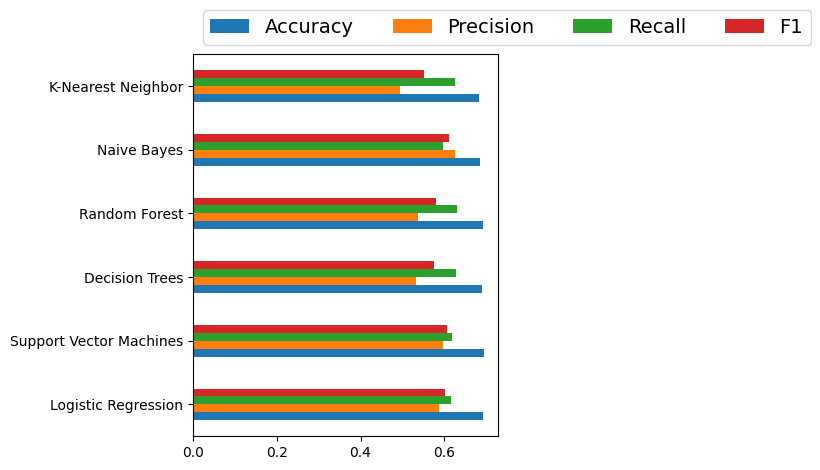

In [209]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()